# RAG Pipeline Evaluation – Final Assignment Notebook

## Project Context and Pipeline Overview

* The Bank of England Employer Project
* Role of the RAG Subteam
* Comparison with Classical Evaluation Stream


## Key Components of the Codebase

* File structure and responsibilities
* Main entry points (`run_chat_app.py`, `streamlit_chat_app.py`)
* Core logic (`process_graph.py`, `chatbot_framework.py`)

## Neo4j Graph Validation

### Direct Cypher Exploration

We manually explored the graph database via the Neo4j Browser to confirm that all expected node types and relationships were present — including Barclays-specific documents.

The structure follows this chain:  
**CORPUS → DOCUMENT → PAGE → FACT**

The following Cypher query confirmed this with all relationships shown:

```cypher
MATCH (c:CORPUS)-[r1]-(d:DOCUMENT)-[r2]-(p:PAGE)-[r3]-(f:FACT)
WHERE c.name CONTAINS "Barclays"
RETURN c, r1, d, r2, p, r3, f
LIMIT 10
```

### Graph View Output

The visual below confirms that the Barclays graph structure is present and complete:

In [1]:
from google.colab import files
uploaded = files.upload()

Saving barclays_graph_structure.png to barclays_graph_structure.png


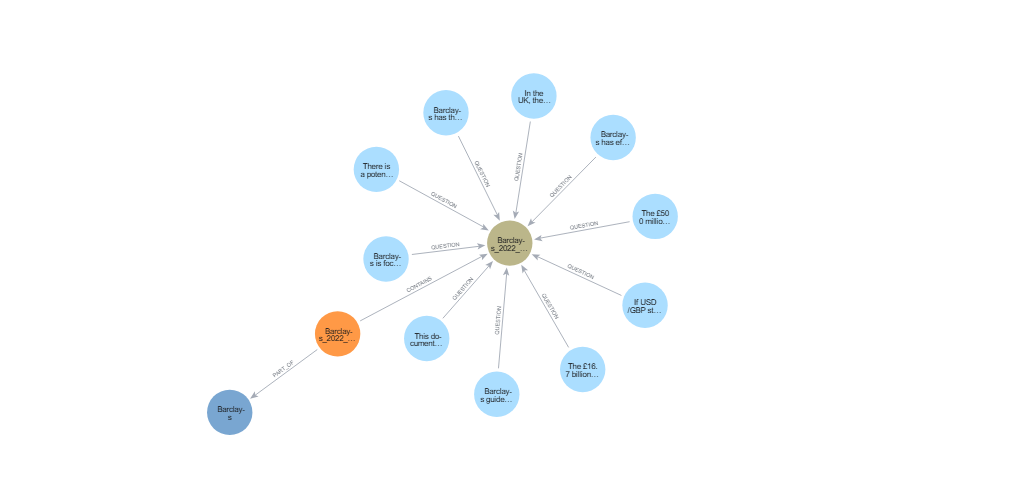

In [2]:
from IPython.display import Image, display
display(Image(filename='barclays_graph_structure.png'))

## Parameter Sensitivity and Defaults

### Threshold and Top-K Parameters

The two main tuning parameters in our graph-based retrieval pipeline are:

- **threshold** – minimum cosine similarity for a fact to be included.
- **top_k** – maximum number of relevant facts to return after filtering.

Lowering threshold or increasing top_k retrieves more facts (higher recall), while increasing threshold or lowering top_k filters more aggressively (higher precision).

Default values: `threshold = 0.6`, `top_k = 5`

| Parameter | Default Value | Defined In        | Description |
|-----------|---------------|-------------------|-------------|
| threshold | 0.6           | `process_graph.py`   | Argument to `GraphProcessor.query_graph()`; filters facts based on average similarity |
| threshold | 0.6           | `ragas_builder.py`   | Passed as a constant when looping over test questions |
| top_k     | 5             | `process_graph.py`   | Passed as `limit` to `query_graph()`; limits number of facts shown via `for fact in sorted_facts[:limit]` |
| top_k     | 5             | `ragas_builder.py`   | Passed to `query_graph()` to control number of returned facts |

### Where They Are Set (Code Snippets)

### Implications for Fact Retrieval and Evaluation

## Evaluation Framework

* RAGAS Metrics Overview
* Use of `ragas_builder.py` and `ragas_eval.py`
* LLM Configuration: `gpt-5-mini` swap


## Neo4j and Retrieval Backend

* Graph Schema and Fact Types
* Cypher Query Construction
* Test Script: `test_neo4j_connection.py`

## Pipeline Execution Flow

* From User Query to Retrieved Facts
* Dynamic Inputs and Static Defaults
* Sample Walkthrough (Screenshot + Code Snippet)

## Challenges and Reflections

* Evaluation Limitations
* Data Format / Retrieval Alignment
* Future Recommendations

## Appendix

* Environment Variables and API Keys
* File Version / Git Branch Used
* Additional Snippets or Screenshots